In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as mno
import seaborn as sns
import time

In [3]:
from sklearn.datasets import load_breast_cancer
wisconsin = load_breast_cancer()
data = pd.DataFrame(wisconsin.data, columns=wisconsin.feature_names)
data['class'] = pd.Series(wisconsin.target)

In [4]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [5]:
data.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'class'],
      dtype='object')

In [6]:
data.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [7]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
data.shape

(569, 31)

In [9]:
data.isnull().values.any()

False

In [10]:
col_list = [c for c in data.columns if data[c].dtype == 'object']
col_list

[]

# Data Exporation

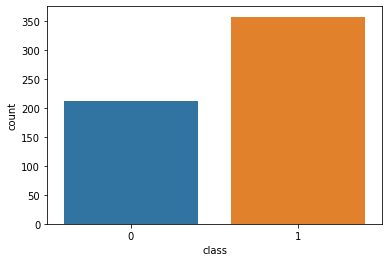

In [11]:
sns.countplot(data['class'],label="Count")

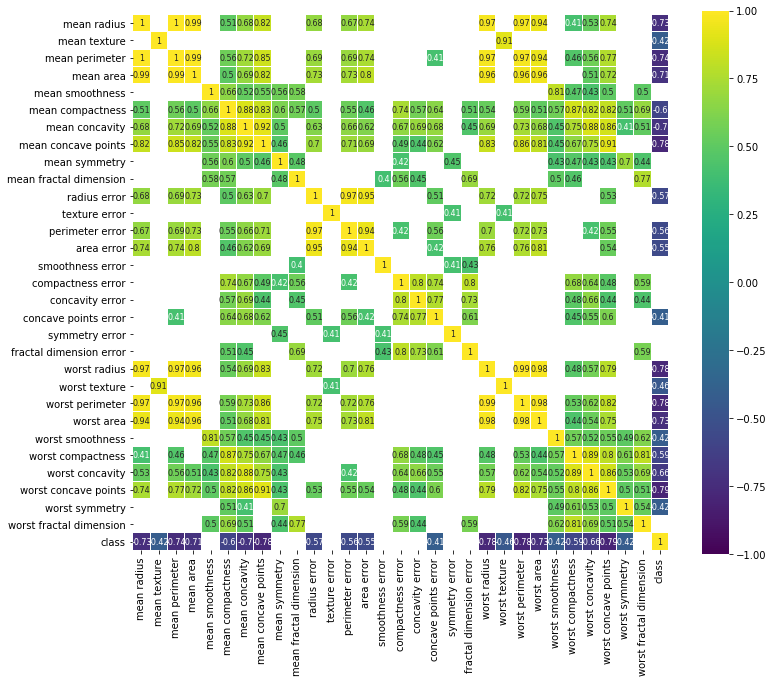

In [12]:
corr = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr[(corr >= 0.4) | (corr <= -0.4)], cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1, 
            annot=True, annot_kws={"size": 8}, square=True)

In [13]:
x = data.copy()
x.drop(columns = 'class')
y = data.copy()
y.drop(columns = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 
                         'mean compactness', 'mean concavity','mean concave points', 'mean symmetry', 
                         'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error',
                         'smoothness error', 'compactness error', 'concavity error', 'concave points error', 
                         'symmetry error', 'fractal dimension error','worst radius', 'worst texture', 
                         'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity',
                         'worst concave points', 'worst symmetry', 'worst fractal dimension'])

,class
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

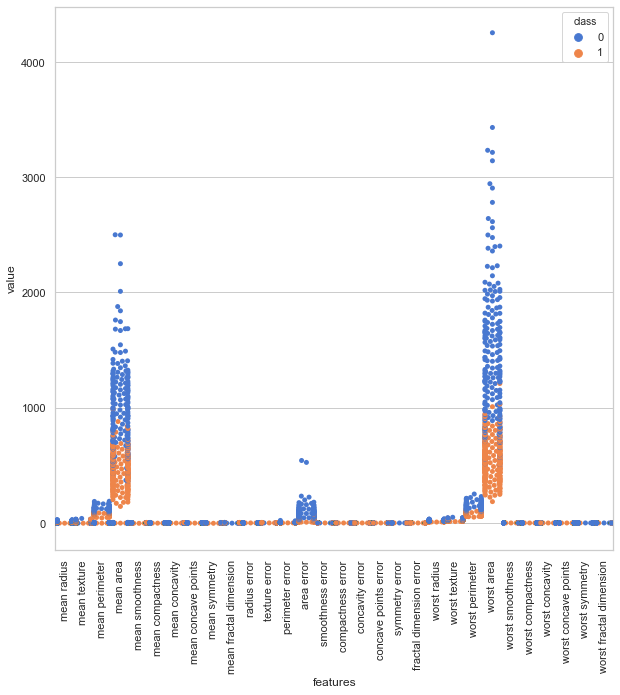

In [16]:
sns.set(style="whitegrid", palette="muted")
data_dia = y
data1 = x
data_n_2 = (data1 - data1.mean()) / (data1.std())              
data1 = pd.concat([y,data_n_2.iloc[:, 0:10]],axis=1)
data1 = pd.melt(data1,id_vars="class",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="class", data=data1)

plt.xticks(rotation=90)

## Random Forest

### RF with feature Selection

In [79]:
train_data = data.copy()

In [80]:
from sklearn.preprocessing import StandardScaler

cols = ['class']

columns = [c for c in train_data.columns if c not in cols]
scaler = StandardScaler()
scaler.fit(train_data[columns])
train_data[columns] = scaler.transform(train_data[columns])

In [26]:
d = ['mean smoothness', 'mean symmetry', 'mean fractal dimension', 'smoothness error', 'compactness error',
     'concavity error', 'symmetry error', 'fractal dimension error', 'worst fractal dimension']
train_data1 = train_data.drop(columns=d)
train_data1.head()

,mean radius,mean texture,mean perimeter,mean area,mean compactness,mean concavity,mean concave points,radius error,texture error,perimeter error,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,class
0,1.097064,-2.073335,1.269934,0.984375,3.283515,2.652874,2.532475,2.489734,-0.565265,2.833031,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,0
1,1.829821,-0.353632,1.685955,1.908708,-0.487072,-0.023846,0.548144,0.499255,-0.876244,0.263327,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0
2,1.579888,0.456187,1.566503,1.558884,1.052926,1.363478,2.037231,1.228676,-0.780083,0.850928,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0
3,-0.768909,0.253732,-0.592687,-0.764464,3.402909,1.915897,1.451707,0.326373,-0.110409,0.286593,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,0
4,1.750297,-1.151816,1.776573,1.826229,0.539340,1.371011,1.428493,1.270543,-0.790244,1.273189,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,0


In [28]:
from sklearn.model_selection import train_test_split
y = train_data1['class']
X = train_data1.drop(columns=['class'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Training Set Dimensions:", X_train.shape)
print("Validation Set Dimensions:", X_test.shape)

Training Set Dimensions: (455, 21)
Validation Set Dimensions: (114, 21)


In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy
randomf = RandomForestClassifier(n_estimators=200)
randomf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
print("Testing Accuracy:", model.score(X_test, y_test))
print("Training Accuracy:", model.score(X_train, y_train))

Testing Accuracy: 0.9473684210526315
Training Accuracy: 1.0


Text(69.0, 0.5, 'Truth')

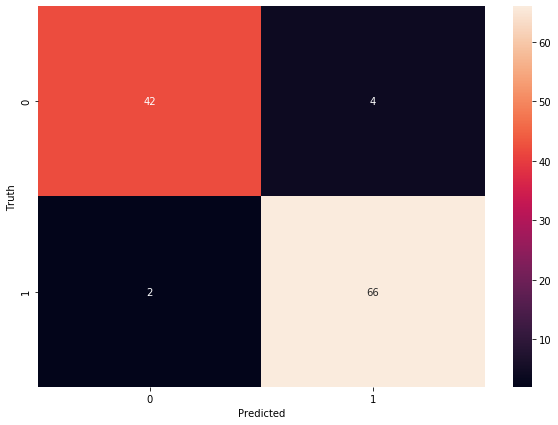

In [44]:
y_predicted = model.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [52]:
n_estimators = [int(x) for x in np.linspace(start=350, stop = 450, num = 4)]
max_features = ['auto', 'sqrt']
max_depth = [14, 18, 32]
min_samples_split= [5,10, 15]
min_samples_leaf = [1, 2]
bootstrap = [True, False]


In [53]:
param_grid = {'n_estimators': n_estimators,
             'max_features': max_features,
             'max_depth': max_depth,
             'min_samples_split': min_samples_split,
             'min_samples_leaf': min_samples_leaf,
             'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [350, 383, 416, 450], 'max_features': ['auto', 'sqrt'], 'max_depth': [14, 18, 32], 'min_samples_split': [5, 10, 15], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [54]:
rf_Model = RandomForestClassifier()

In [55]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [56]:
rf_Grid.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   15.7s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:  2.3min
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:  3.9min
[Parallel(n_jobs=4)]: Done 864 out of 864 | elapsed:  5.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [57]:
rf_Grid.best_params_

{'bootstrap': False,
 'max_depth': 14,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 350}

In [58]:
print("Training Accuracy:", rf_Grid.score(X_train,y_train))
print("Testing Accuracy:", rf_Grid.score(X_test,y_test))

Training Accuracy: 1.0
Testing Accuracy: 0.9473684210526315


# Support Vector Classifier

In [59]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [60]:
y_pred = classifier.predict(X_test)

In [61]:
print("Testing Accuracy:", classifier.score(X_test, y_test))
print("Training Accuracy:", classifier.score(X_train, y_train))

Testing Accuracy: 0.9649122807017544
Training Accuracy: 0.989010989010989


In [76]:
def Classification_model_gridsearchCV(model,param_grid,data_X,data_y, X_test1, y_test1):
    clf = GridSearchCV(model,param_grid,cv=10,scoring="accuracy")
       
    clf.fit(data_X,data_y)
    print("The best parameter found on development set is :")
   
    print(clf.best_params_)
    print("the bset estimator is ")
    print(clf.best_estimator_)
    print("The Training best score is ")
    
    print(clf.best_score_)
    print("The best Testing score is :", clf.score(X_test1,y_test1))

In [78]:
model=SVC()
param_grid = [
              {'C': [1, 10, 100, 1000], 
               'kernel': ['linear']
              },
              {'C': [1, 10, 100, 1000], 
               'gamma': [0.001, 0.0001], 
               'kernel': ['rbf']
              },
 ]
Classification_model_gridsearchCV(model,param_grid,X_train,y_train,X_test, y_test)

The best parameter found on development set is :
{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
the bset estimator is 
SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
The Training best score is 
0.9845893719806764
The best Testing score is : 0.956140350877193


# KNNs

In [72]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

k_range = list(range(1, 30))
leaf_size = list(range(1,30))
weight_options = ['uniform', 'distance']
param_grid = {'n_neighbors': k_range, 'leaf_size': leaf_size, 'weights': weight_options}
Classification_model_gridsearchCV(model,param_grid,X_train,y_train, X_test, y_test)

The best parameter found on development set is :
{'leaf_size': 1, 'n_neighbors': 4, 'weights': 'distance'}
the bset estimator is 
KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='distance')
The Training best score is 
0.9756521739130435
The best Testing score is : 0.9473684210526315


# Decision Tree Classifier

In [75]:
from sklearn.tree import DecisionTreeClassifier
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': [2,3,4,5,6,7,8,9,10], 
              'min_samples_leaf':[2,3,4,5,6,7,8,9,10] }

model= DecisionTreeClassifier()
Classification_model_gridsearchCV(model,param_grid,X_train,y_train, X_test, y_test)

The best parameter found on development set is :
{'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 3}
the bset estimator is 
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Training best score is 
0.9560386473429953
The best Testing score is : 0.8947368421052632


#### We See that SVM is the best classifier